# Assignment 2: Spam Classification with SVM

### CS 4501 Machine Learning - Department of Computer Science - University of Virginia

![Spam email](https://www.saleshandy.com/blog/wp-content/uploads/2017/01/wsi-imageoptim-11-Reasons-Why-Your-Email-Ends-Up-In-Spam.png)

*Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. In this part of the assignment, you will use SVMs to build your own spam filter. For references, you may refer to my [lecture 6](https://drive.google.com/open?id=1CeBhepjDKBaFBq2BZq-zNQs-MC8ll7aL4qAF8TJ24FM) and [lecture 6b](https://drive.google.com/open?id=13BidUAs_c2QdZkf92axt2S748sbnbI9Hgxg-fzb-OuU) or Chapter 5 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.*


---
## 1. PRE-PROCESSING THE DATA (20 pts)

**Data Acquiring:** Download the spam dataset from UC Irvine. You can find the dataset attached with the assignment in Collab. Note that the data is in raw file, so you have to convert them into a readable format (ie. CSV). Please be sure to read its documentation to learn more about the dataset. 

**Data Splitting:** Put data into the format needed for classification task, then split it into 80% training, 20% testing (each should have approximately the same proportion between positive and negative examples).

**Data Discovery:** Plot out all correlations among the features. You may notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your SVM model later on.

**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. 

**Feature Scaling** You can use the standard library StandardScaler to normalize the value of each features.

In [1]:
# You might want to use the following packages
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import os

np.random.seed(42)

cols = ['word_freq_make' ,'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over',
        'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 
        'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email',
        'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 
        'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
        'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
        'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
        'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 
        'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest',
        'capital_run_length_total', 'spam']

def load_data(path = '../Downloads/spambase'):
    csv_path = os.path.join(path, "spambase.data")
    return pd.read_csv(csv_path, names=cols)

spam = load_data()

spam.describe()

# Your code goes here for this section.
# X_train = ;
# y_train = ;
# X_test = ;
# y_test = ;

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [2]:
sample_incomplete_rows = spam[spam.isnull().any(axis=1)].head()
sample_incomplete_rows

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam


In [3]:
corr_matrix = spam.corr();
corr_matrix["spam"].sort_values(ascending=False)

spam                          1.000000
word_freq_your                0.383234
word_freq_000                 0.334787
word_freq_remove              0.332117
char_freq_$                   0.323629
word_freq_you                 0.273651
word_freq_free                0.263215
word_freq_business            0.263204
capital_run_length_total      0.249164
word_freq_our                 0.241920
char_freq_!                   0.241888
word_freq_receive             0.234529
word_freq_over                0.232604
word_freq_order               0.231551
word_freq_money               0.216111
capital_run_length_longest    0.216097
word_freq_internet            0.206808
word_freq_email               0.204208
word_freq_all                 0.196988
word_freq_addresses           0.195902
word_freq_credit              0.189761
word_freq_mail                0.138962
word_freq_people              0.132927
word_freq_make                0.126208
capital_run_length_average    0.109999
word_freq_font           

In [4]:
#['word_freq_hp', 'word_freq_george', 'word_freq_cs', 'word_freq_edu', 'capital_run_length_longest']
spam.plot(kind = "scatter", x = "word_freq_hp", y='spam')
spam.plot(kind = "scatter", x = "word_freq_george", y='spam')
spam.plot(kind = "scatter", x = "word_freq_cs", y='spam')
spam.plot(kind = "scatter", x = "word_freq_edu", y='spam')
spam.plot(kind = "scatter", x = "capital_run_length_longest", y='spam')





In [ ]:
y = spam.spam.astype(float)
X = spam.drop('spam', axis=1).astype(float)

X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
#wine = train_set.drop("quality", axis =1)
#wine_labels = train_set["quality"].copy()

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

X_train = num_pipeline.fit_transform(X_train1)
X_test = num_pipeline.transform(X_test1)

- - -
## 2. TRAINING LINEAR SVM FOR SPAM CLASSIFICATION (15 pts)

Train your linear SVM classifier on the training data, and then test the classifier on the test data. You may use the default **loss function** (="hinge") and **default** value of the C hyperparameter (=1.0):

* Report (1) accuracy, (2) precision, (3) recall, and (4) F-score on the test data
* Create an ROC curve, using 100 evenly spaced thresholds, for this SVM. You may use library function calls to create the ROC curve.

**Implementation Notes:** For SVM, you do NOT need to add a column of 1's to the $\mathbf{x}$ matrix to have an intercept term



Accuracy:  0.9250814332247557
Precision:  0.9349593495934959
Recall:  0.8846153846153846
Fscore:  0.909090909090909


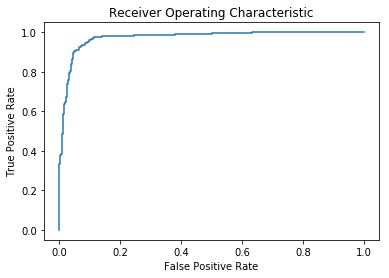

In [ ]:
from sklearn.svm import LinearSVC
import warnings; warnings.simplefilter('ignore')

# Training your svm here
svm_clf = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf.fit(X_train,y_train)

# Testing your svm here
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve

def performance(svm_clf):
    accuracy = svm_clf.score(X_test, y_test)
    predicted = svm_clf.predict(X_test); 
    precision = precision_score(y_test, predicted)
    recall = recall_score(y_test, predicted)
    Fscore = 2*(precision*recall) / (precision+recall)

    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('Fscore: ', Fscore)

    df = svm_clf.decision_function(X_test); #decision function
    fpr, tpr, thresholds = roc_curve(y_test, df)

    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

performance(svm_clf)

- - -
## 3. TUNING REGULARIZATION HYPER-PARAMETER C (15 pts)
Next, you will study the SVM tradeoff between margin and data violation by using different values of the C hyper-parameter. Your task is to run an experiment with different values of C on the spam dataset and report the performance measures similar to section 2. After running the experiment, you must provide some justifications on the reason you select a certain value of C. 

Hint: you can use cross validation for each value of C and then pick the value which yields the best performance.

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
import warnings; warnings.simplefilter('ignore')

#svm_clf = LinearSVC(C=1, loss="hinge", random_state=42, max_iter=1000000)
#svm_clf.fit(X_train,y_train)

#gridsearch

param_grid = [
  {'C': [.1, 1, 10, 100]},
]

gs = GridSearchCV(LinearSVC(), param_grid, cv=5, scoring='accuracy')
gs.fit(X_train,y_train)
print("Best C value for accuracy: ")
print(gs.best_params_)
    
gs = GridSearchCV(LinearSVC(), param_grid, cv=5, scoring='precision')
gs.fit(X_train,y_train)
print("Best C value for precision: ")
print(gs.best_params_)

gs = GridSearchCV(LinearSVC(), param_grid, cv=5, scoring='recall')
gs.fit(X_train,y_train)
print("Best C value for recall: ")
print(gs.best_params_)



Best C value for accuracy: 
{'C': 1}
Best C value for precision: 
{'C': 0.1}
Best C value for recall: 
{'C': 10}


C=.1
Accuracy:  0.9174809989142236
Precision:  0.9313186813186813
Recall:  0.8692307692307693
Fscore:  0.8992042440318303


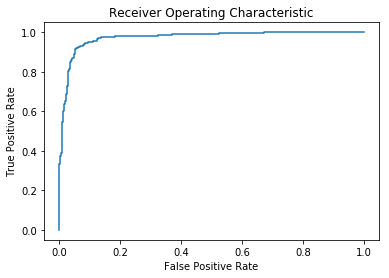

C=1
Accuracy:  0.9250814332247557
Precision:  0.9349593495934959
Recall:  0.8846153846153846
Fscore:  0.909090909090909


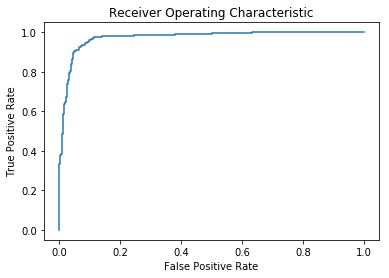

C=10
Accuracy:  0.9196525515743756
Precision:  0.9340659340659341
Recall:  0.8717948717948718
Fscore:  0.9018567639257294


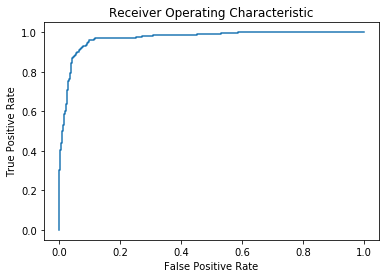

C=100
Accuracy:  0.9120521172638436
Precision:  0.912
Recall:  0.8769230769230769
Fscore:  0.8941176470588236


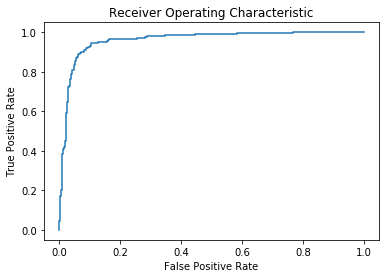

In [ ]:
print('C=.1')
svm_clf = LinearSVC(C=.1, loss="hinge", random_state=42)
svm_clf.fit(X_train,y_train)
performance(svm_clf)

print('C=1')
svm_clf = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf.fit(X_train,y_train)
performance(svm_clf)

print('C=10')
svm_clf = LinearSVC(C=10, loss="hinge", random_state=42)
svm_clf.fit(X_train,y_train)
performance(svm_clf)

print('C=100')
svm_clf = LinearSVC(C=100, loss="hinge", random_state=42)
svm_clf.fit(X_train,y_train)
performance(svm_clf)

The best value for C is 1. In general, our performance measures are maximized when C=1. When running grid search on the default setting (which defaults to checking accuracy), the best parameter value for C is one. Precision, recall, and Fscore are all also high when C=1, making it a good choice for the parameter value.

- - -
## 4. SELECTING THE FEATURES WITH LINEAR SVM (20 pts)

Once your learned a best linear SVM in previous sections, your next task is to find which are best features to classify spam. First, you must obtain the weight vector $\mathbf{w}$ using the attribute $coef_$ of your SVM classifier. Then, for the number of features $n = 2$ to $57$, you will run the following in a loop:

* Select a set of top $n$ features that have the highest weights
* Train a classifier $\text{SVM}_n$ on all training data, only using these $n$ features with the same hyperparameter C learn from section 3.
* Test $\text{SVM}_n$ on the test set (using the same $n$ features) to obtain accuracy.
* Plot accuracy on test data vs. $n$ number of features

Identify the top 5 features. Using the plot, discuss the effects of feature selection on the performance in a short paragraph (ie. How much better the performance becomes everytime one of top 5 features is added? Were the top spam features surprising to you?)  



In [ ]:
# Your feature selection code goes here
svm_clf.fit(X_train,y_train)

w = svm_clf.coef_[0]
accuracy = []
for n in range (2,57):
    max_w = sorted(w, key=abs, reverse=True)[:n]
    new_cols = []
    for i in range (0,w.size-1):
        if w[i] in max_w:
            new_cols.append(cols[i])
    
    if(n==5): 
        print("Top five features: ")
        print(new_cols)
    X_train_sub = X_train1[new_cols]
    X_test_sub = X_test1[new_cols]
    X_train_sub = num_pipeline.fit_transform(X_train_sub)
    X_test_sub = num_pipeline.fit_transform(X_test_sub)

    svm_clf.fit(X_train_sub, y_train)
    accuracy.append(svm_clf.score(X_test_sub, y_test))        
    

# Your paragraph goes here for this section

Top five features: 
['word_freq_addresses', 'word_freq_hp', 'word_freq_george', 'word_freq_cs', 'capital_run_length_average']


In [ ]:
import matplotlib.pyplot as plt;

plt.title('Accuracy vs Number of features')
plt.plot(accuracy)
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.show()

Feature selection is very important. Once the number of features reaches around 20, the accuracy doesn't change much. By identifying the top features, we can preserve accuracy while speeding up our model.
The top five features, printed above, were pretty surprising to me. I'm not sure exactly why the frequency of the word george has such a big correlation with spam.

- - -
## 5. KERNELIZING SVM WITH THE GAUSSIAN RBF (30 pts)

In this part of the asisgnment, you will be using SVMs to do non-linear classification. In particular, you will be using SVMs with Gaussian kernels on this dataset which is not linearly separable. 

$
    \mathbf{K}_{RBF}(\mathbf{x}^{(i)},\mathbf{x}^{(j)}) = \exp(-\gamma ||\mathbf{x}^{(i)} -\mathbf{x}^{(j)}||^2).
$

First, your task is to determine the best regularization $C$ and the spread of the Gaussian kernel $\gamma$ hyperparameters to use. You can train the SVM on the training set and report the performance in metrics from section 2. By using different values of $C$ and $\gamma$, you will be able to learn a good non-linear decision boundary that can perform reasonably well for this dataset. 

Next, you will compare the performance of this kernelized version of SVM and the of linear SVM in Section 3. You will need to plot out the performance in terms of accuracy, precision, and recall, and the ROC curve) for both. How much better does your non-linear SVM classifier perform comparing to a linear SVM? 

**Implementation Note:** When implementing cross validation to select the best C and $\gamma$ parameter to use, you need to evaluate the error using cross validation.

Finally, write a paragraph reporting on the final performance of your RBF kerneled SVM. Do you think the performance is adequate to be deployed in practice? Justify your reasons.




In [ ]:
from sklearn.svm import SVC
#hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2), ...
#for gamma, C in hyperparams:
    #rbf_kernel_svm_clf = SVC(kernel="rbf", gamma=gamma, C=C))
    #rbf_kernel_svm_clf.fit(X_cv, y_cv)
#    # Your code to train and find the best value of C and gamma here


param_grid1 = {'C': [.1, 1, 10, 100], 'gamma': [.01, .11, 1]}

gs = GridSearchCV(SVC(kernel="rbf"), param_grid1, cv=5, scoring='accuracy')
gs.fit(X_train,y_train)
print("Best param values for accuracy: ")
bestparams = gs.best_params_
print(bestparams)
C = bestparams['C']
gamma = bestparams['gamma']

svm_clf = SVC(C=C, gamma=gamma, kernel="rbf", random_state=42)
svm_clf.fit(X_train,y_train)

performance(svm_clf)

Our final RBF kerneled SVM performs well. The accuracy is 94% and the precision is 95%, which I feel would be satisfactory for a spam filter. For this type of problem, precision and accuracy are more important than recall. I think that this performance is adequate to be deployed in practice.

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [lecture 6](https://drive.google.com/open?id=1CeBhepjDKBaFBq2BZq-zNQs-MC8ll7aL4qAF8TJ24FM) and [lecture 6b](https://drive.google.com/open?id=13BidUAs_c2QdZkf92axt2S748sbnbI9Hgxg-fzb-OuU) and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](https://docs.google.com/document/d/15qB84xjaS-uRJmfKmmQuCz38bLMFaoqdbuRLoZEdOYI/edit#heading=h.72k1pvft525n)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4501 Assignment 2:...".

Best of luck and have fun!